In [1]:
!pip install 'h5py==2.10.0' --force-reinstall

     |████████████████████████████████| 2.9MB 23.6MB/s 
     |████████████████████████████████| 15.7MB 189kB/s 
ERROR: tensorflow 2.5.0 has requirement h5py~=3.1.0, but you'll have h5py 2.10.0 which is incompatible.
ERROR: tensorflow 2.5.0 has requirement numpy~=1.19.2, but you'll have numpy 1.21.0 which is incompatible.
ERROR: tensorflow 2.5.0 has requirement six~=1.15.0, but you'll have six 1.16.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement six~=1.15.0, but you'll have six 1.16.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: six 1.15.0
    Uninstalling six-1.15.0:
      Successfully uninstalled six-1.15.0
  Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Found e

In [1]:
!pip install -U -q segmentation-models
!pip install -q tensorflow==2.1
!pip install -q keras==2.3.1
!pip install -q tensorflow-estimator==2.1.

## Imports libs
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
os.environ["SM_FRAMEWORK"] = "tf.keras"

from tensorflow import keras
import segmentation_models as sm

     |████████████████████████████████| 51kB 6.1MB/s 
     |████████████████████████████████| 421.8MB 37kB/s 
     |████████████████████████████████| 450kB 44.8MB/s 
     |████████████████████████████████| 3.9MB 32.5MB/s 
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
     |████████████████████████████████| 378kB 24.9MB/s 
Segmentation Models: using `tf.keras` framework.


In [12]:
import tensorflow as tf
import glob
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

In [3]:
SIZE_X=128
SIZE_Y=128

In [7]:
from tensorflow import keras
model_cauliflower =keras.models.load_model('/content/drive/MyDrive/Colab_Notebooks/membrane4000.h5',compile=False)
model_weed =keras.models.load_model('/content/drive/MyDrive/Colab_Notebooks/membrane5000.h5',compile=False)

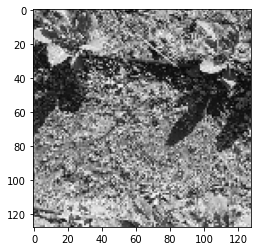

In [8]:
test_img=cv2.imread('/content/drive/MyDrive/Colab_Notebooks/Sub_Images/1.jpg',cv2.IMREAD_GRAYSCALE)
test_img=cv2.resize(test_img,(SIZE_Y,SIZE_X))
test_img=cv2.cvtColor(test_img,cv2.COLOR_RGB2BGR)
plt.imshow(test_img, cmap='gray')
test_img = np.expand_dims(test_img, axis=0)
test_img = tf.cast(test_img, dtype='float64')
test_img=[test_img]
prediction_cauliflower=model_cauliflower.predict(test_img)
prediction_weed=model_weed.predict(test_img)

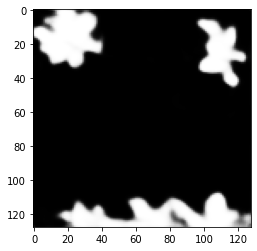

In [26]:
prediction_image_cauliflower=prediction_cauliflower.reshape((SIZE_Y,SIZE_X))
plt.imshow(prediction_image_cauliflower, cmap='gray')

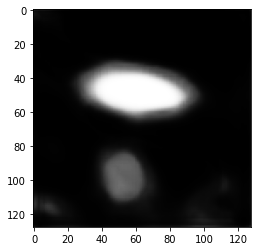

In [27]:
prediction_image_weed=prediction_weed.reshape((SIZE_Y,SIZE_X))
plt.imshow(prediction_image_weed, cmap='gray')

In [29]:
prediction_image_cauliflower

array([[1.1156070e-01, 2.6989559e-02, 2.0796895e-02, ..., 3.4449154e-03,
        4.7371625e-03, 3.7908737e-02],
       [1.5941055e-02, 4.1439799e-03, 2.1433514e-03, ..., 1.9028156e-04,
        2.1589670e-04, 2.3092644e-03],
       [1.3230053e-02, 5.3290497e-03, 3.7735861e-03, ..., 5.8358937e-04,
        6.8615604e-04, 3.0528784e-03],
       ...,
       [1.7750435e-02, 3.7155310e-03, 2.6365870e-03, ..., 6.7585462e-01,
        7.0725226e-01, 6.4759606e-01],
       [2.8408024e-02, 3.4475699e-03, 2.4173777e-03, ..., 6.8074828e-01,
        6.0367680e-01, 4.2517188e-01],
       [8.4976353e-02, 2.2113295e-02, 9.8680286e-03, ..., 6.5433592e-01,
        5.1887000e-01, 4.4769940e-01]], dtype=float32)

In [36]:
def M_Score(Cauliflower_Image,Weed_Image):
  sum_C=np.sum(Cauliflower_Image)
  sum_W=np.sum(Weed_Image)
  Output={}
  Output['Cauliflower_Content']=(sum_C/(sum_W+sum_C))*100
  Output['Weed_Content']=(sum_W/(sum_W+sum_C))*100
  return Output

In [37]:
Op=M_Score(prediction_image_cauliflower,prediction_image_weed)

In [38]:
print(Op)

{'Cauliflower_Content': 61.99430823326111, 'Weed_Content': 38.00569176673889}
